## credit card customer churn prediction

In [98]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [25]:
## import basic libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
df= pd.read_csv("C:\\Users\\pavan\\Downloads\\churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [101]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [124]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [125]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [38]:
x= df.iloc[:,3:13]
y= df.iloc[:,13]

In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [40]:
# feature engineering
Geography = pd.get_dummies(x['Geography'], drop_first=True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [41]:
Gender = pd.get_dummies(x['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [42]:
## Concatenate the Data Frames
x=pd.concat([x,Geography,Gender],axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [43]:
X = x.drop(["Geography","Gender"],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [105]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
X_train.shape

(8000, 11)

In [115]:
## create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [116]:
# Initialising the ANN
model = Sequential()
# Adding the input layer for ANN
model.add(Dense(units=11,activation='relu'))

#Adding the first hidden layer 
model.add(Dense(units=7,activation='relu'))


# Adding the second hidden layer
model.add(Dense(units=6,activation='relu'))


# Adding the output layer
model.add(Dense(1,activation='relu'))

In [123]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 11)                132       
                                                                 
 dense_32 (Dense)            (None, 7)                 84        
                                                                 
 dense_33 (Dense)            (None, 6)                 48        
                                                                 
 dense_34 (Dense)            (None, 1)                 7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# Train the model
model_history = model.fit(X_train, y_train, epochs=50,validation_split=0.33, batch_size=10)

Epoch 1/50
536/536 [==============================] - 4s 4ms/step - loss: 0.7029 - accuracy: 0.7912 - val_loss: 0.5407 - val_accuracy: 0.7944
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7983 - val_loss: 0.4901 - val_accuracy: 0.8027
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4776 - accuracy: 0.8029 - val_loss: 0.4760 - val_accuracy: 0.8020
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4609 - accuracy: 0.8089 - val_loss: 0.4726 - val_accuracy: 0.8001
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4498 - accuracy: 0.8132 - val_loss: 0.4566 - val_accuracy: 0.8080
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4379 - accuracy: 0.8192 - val_loss: 0.4565 - val_accuracy: 0.8076
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4266 - accuracy: 0.8220 - val_loss: 0.4434 - val_accuracy: 0.8103
Epoch 

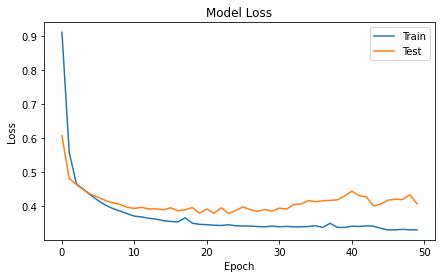

In [91]:
# Plot training & validation loss values
plt.figure(figsize=(7, 4))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

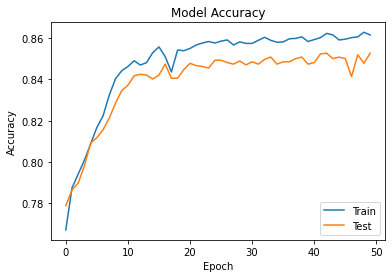

In [92]:
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [112]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [119]:
# weights and bias for the first layer.
model.layers[1].get_weights() 

[array([[-0.25861964,  0.35468155,  0.26413068,  0.49758092,  0.18265386,
         -0.17098477, -0.3784508 ],
        [-0.04943867, -0.5454162 , -0.27810514,  0.48701817, -0.15957251,
         -0.4268185 ,  0.09978641],
        [-0.20946224, -0.5709835 , -0.06302094,  1.2380621 ,  0.65002733,
         -0.39274034, -0.64062065],
        [ 0.3440855 , -0.02125754, -0.05826655, -0.40025148, -0.25530267,
         -0.6110089 ,  0.03127683],
        [-0.2343844 , -0.06370696, -0.62809974,  0.35809752, -0.08734463,
         -0.4745024 ,  0.2909344 ],
        [-0.4784741 , -0.3673599 , -0.31271136,  0.12906528, -0.21421036,
         -0.2382385 , -0.34105822],
        [-0.4004506 ,  0.14616962, -0.11003981,  0.1386148 ,  0.08723889,
          0.40417868, -0.19168426],
        [ 0.5890395 ,  0.07395203,  0.1159662 , -0.3578608 , -0.26041764,
         -0.6760225 , -0.10420755],
        [ 0.04636134,  0.1281461 , -0.5827124 , -0.22037466,  0.23654565,
          0.41660056,  0.527239  ],
        [ 

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1585,   10],
       [ 404,    1]], dtype=int64)

In [121]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score =accuracy_score(y_pred,y_test)
score

0.793